In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df2 = pd.read_csv('Titanic_test.csv')
df1 = pd.read_csv('Titanic_train.csv')

In [68]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [71]:
df1['Cabin'] = df1['Cabin'].fillna(df1['Cabin'].mode()[0])
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
display(df1.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [72]:
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].median())
display(df1.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [73]:
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])
display(df1.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


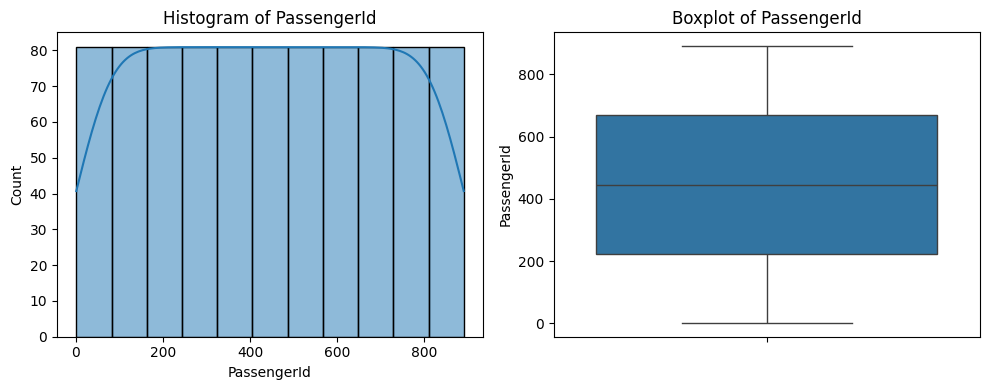

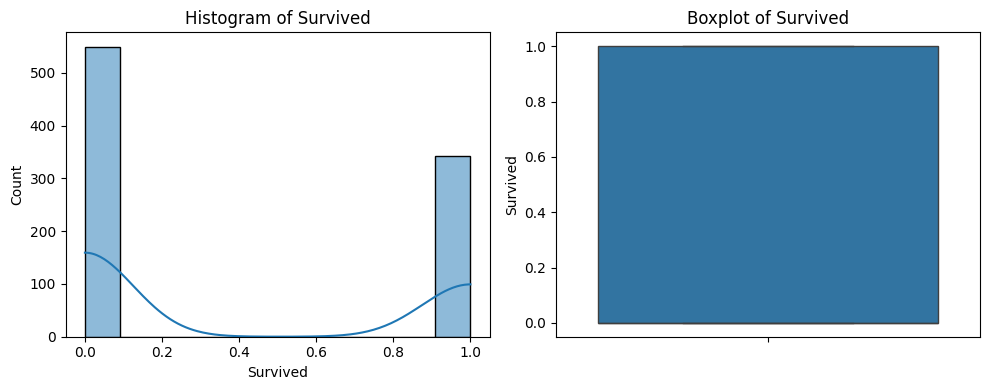

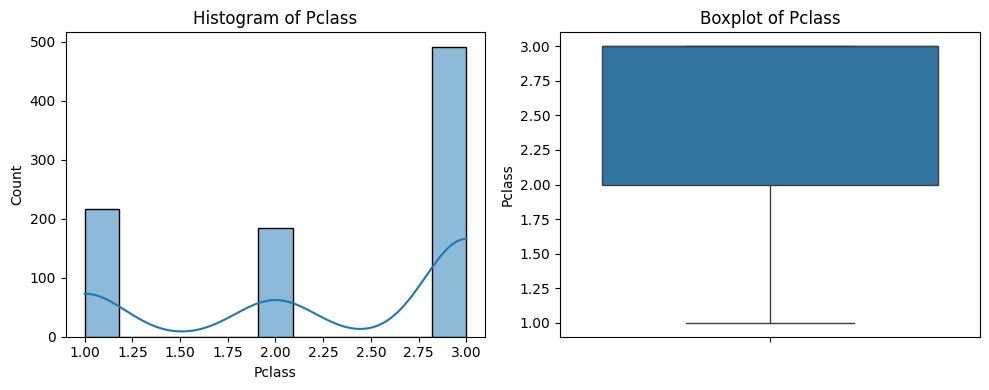

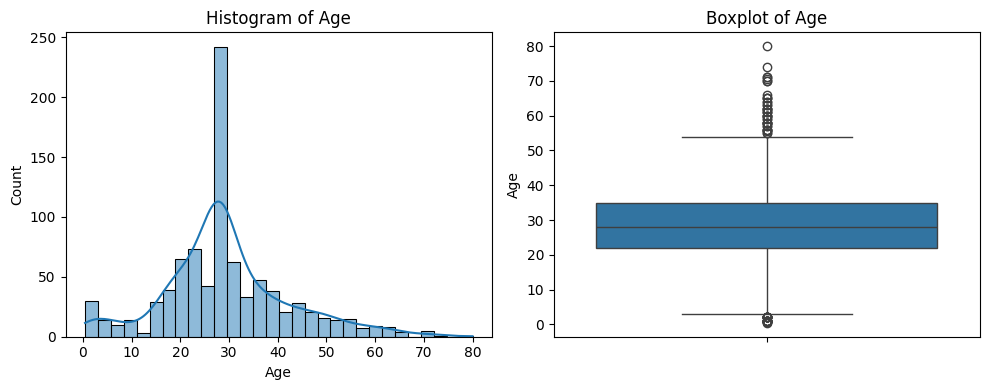

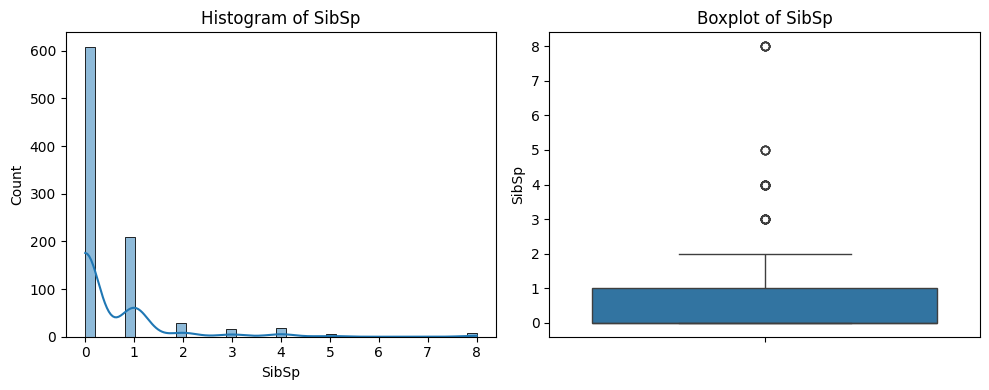

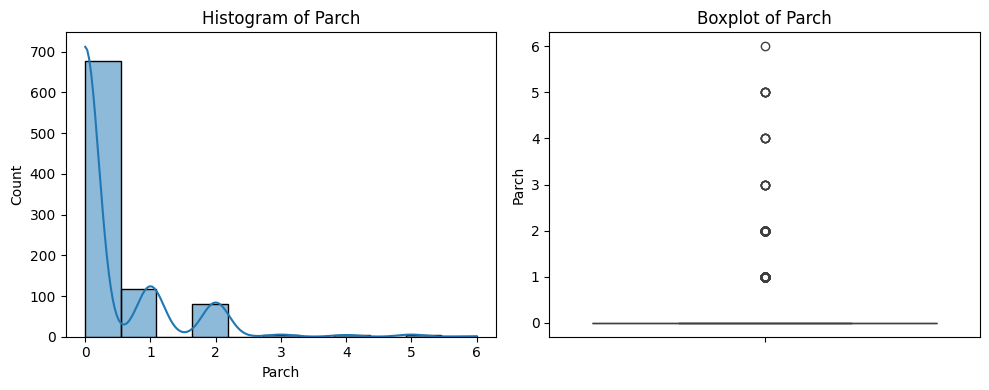

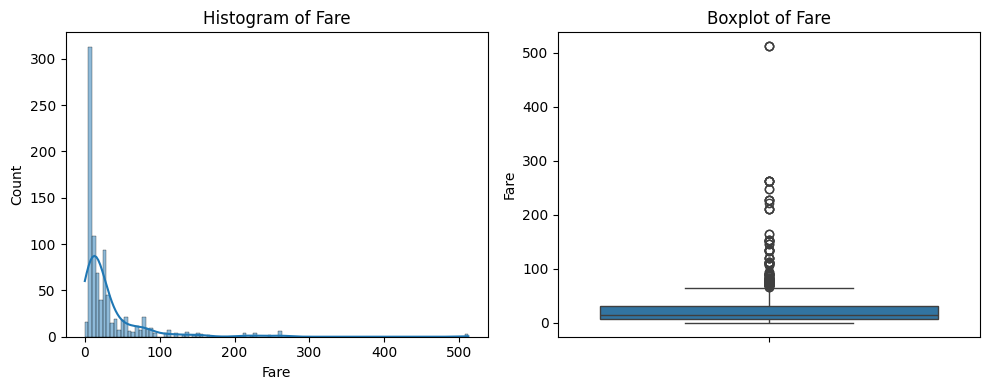

In [74]:
numerical_cols = df1.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df1[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [75]:
df1 = df1.drop('Cabin', axis=1)
display(df1.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


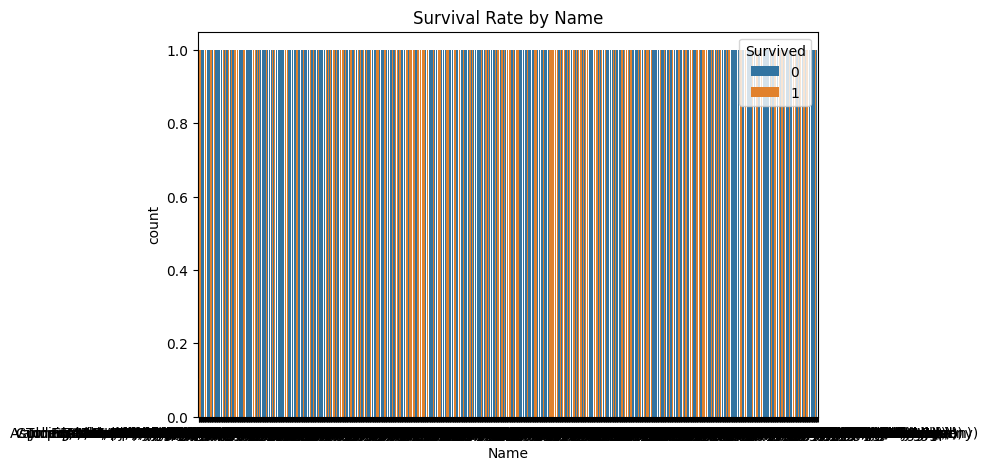

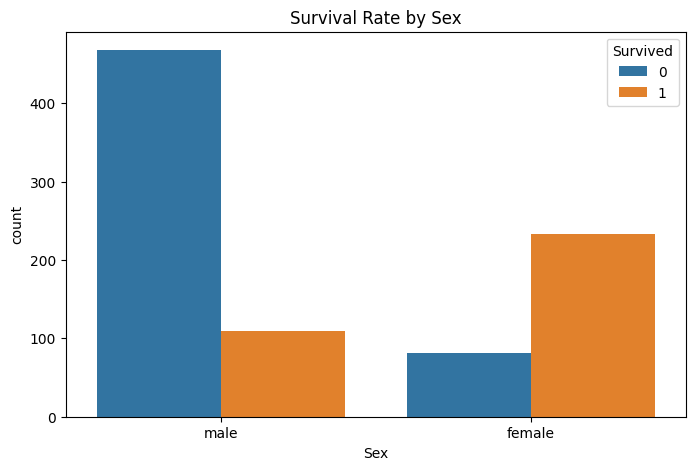

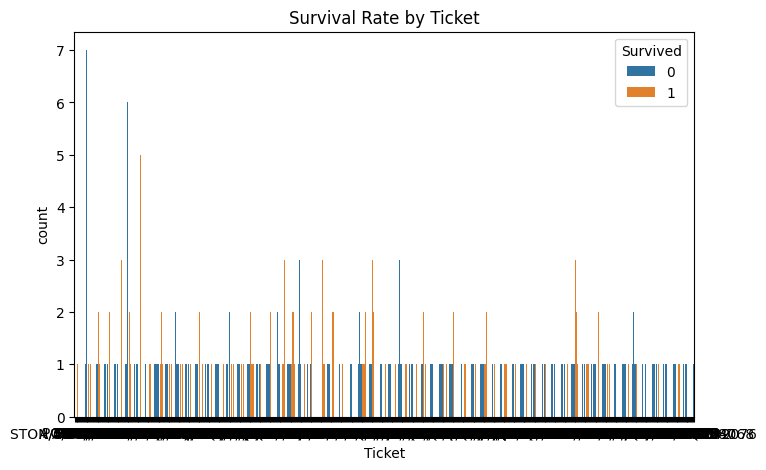

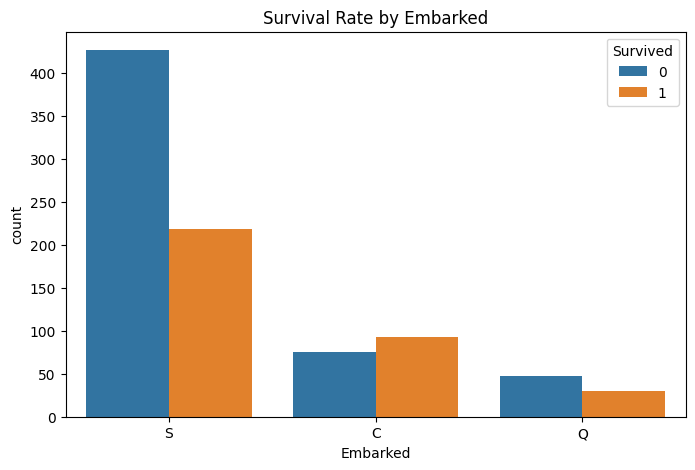

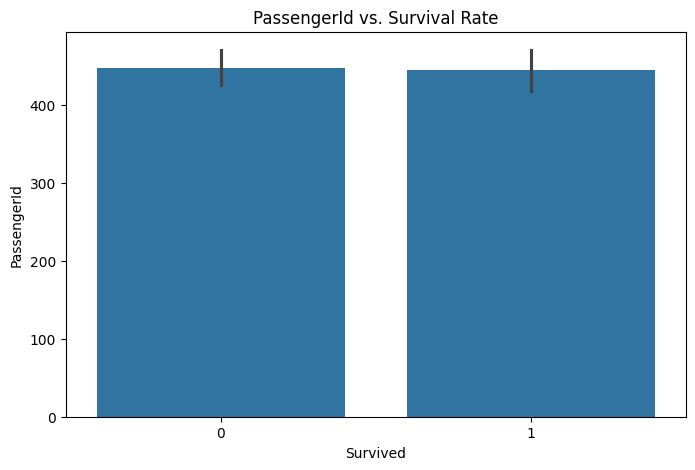

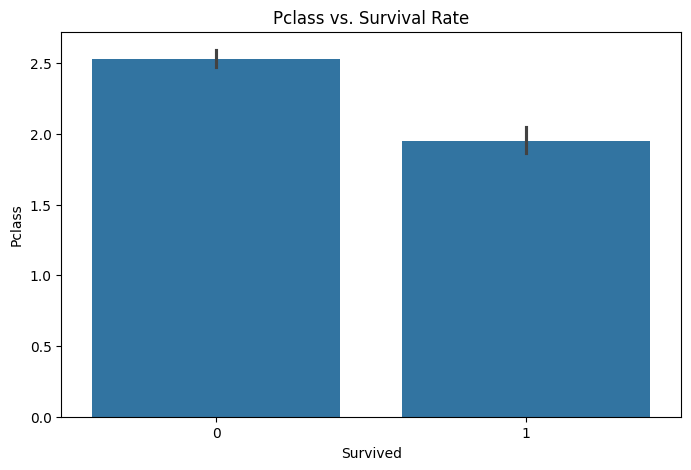

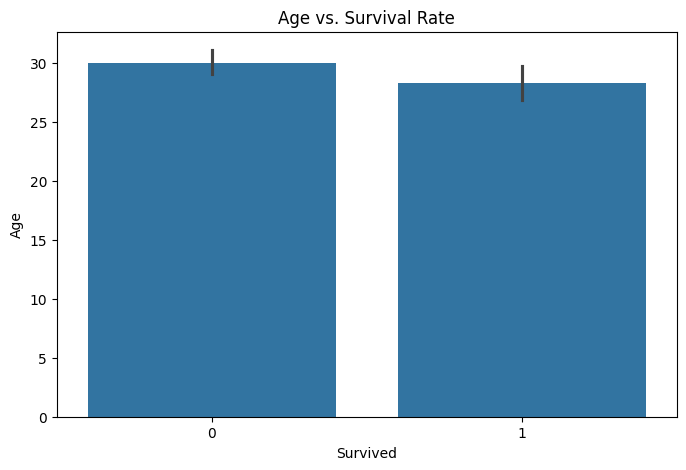

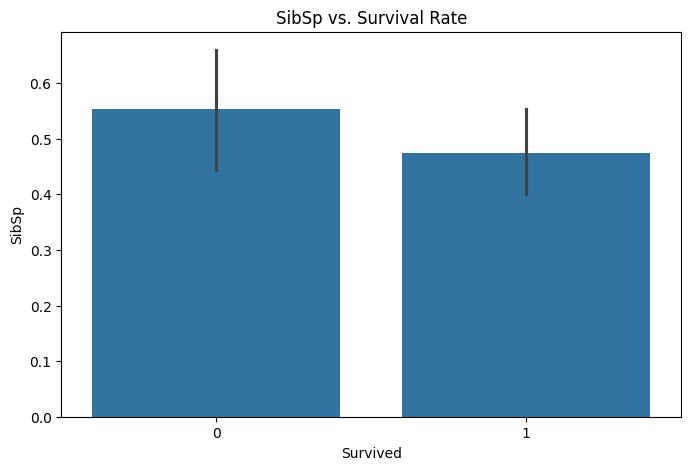

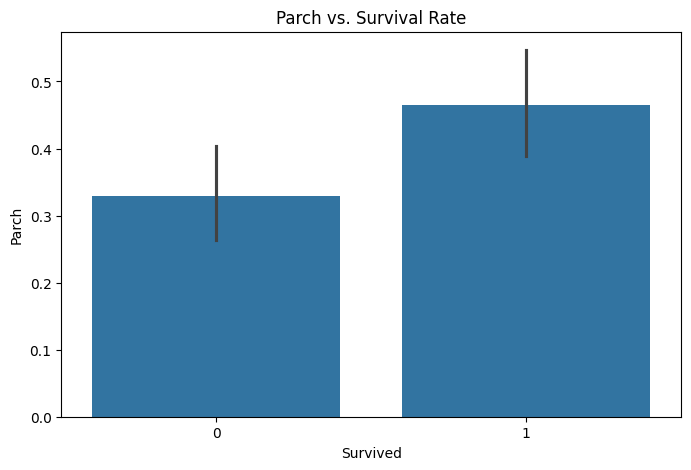

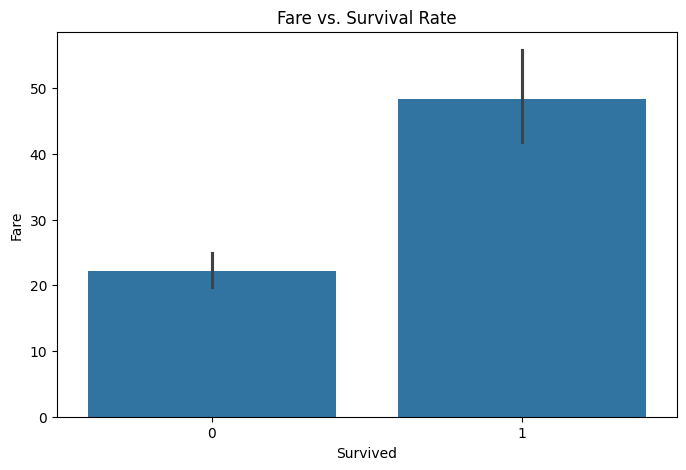

In [76]:
categorical_cols = df1.select_dtypes(include='object').columns
numerical_cols = df1.select_dtypes(include=np.number).columns.drop('Survived')

# Bar plots for categorical features vs. Survived
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Survived', data=df1)
    plt.title(f'Survival Rate by {col}')
    plt.show()

# Bar plots for numerical features vs. Survived (consider binning for continuous data)
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Survived', y=col, data=df1)
    plt.title(f'{col} vs. Survival Rate')
    plt.show()

In [77]:
df1 = df1.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
display(df1.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [78]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'Embarked' column
encoded_embarked = encoder.fit_transform(df1[['Embarked']])

# Create a DataFrame from the encoded data
encoded_embarked_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(['Embarked']))

# Drop the original 'Embarked' column and concatenate the new encoded columns
df1 = df1.drop('Embarked', axis=1)
df1 = pd.concat([df1, encoded_embarked_df], axis=1)

display(df1.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0


In [79]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'Sex' column
encoded_sex = encoder.fit_transform(df1[['Sex']])

# Create a DataFrame from the encoded data
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))

# Drop the original 'Sex' column and concatenate the new encoded columns
df1 = df1.drop('Sex', axis=1)
df1 = pd.concat([df1, encoded_sex_df], axis=1)

display(df1.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [80]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to 'Age' and 'Fare' columns
df1[['Age', 'Fare']] = scaler.fit_transform(df1[['Age', 'Fare']])

display(df1.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,-0.565736,1,0,-0.502445,0.0,0.0,1.0,0.0,1.0
1,1,1,0.663861,1,0,0.786845,1.0,0.0,0.0,1.0,0.0
2,1,3,-0.258337,0,0,-0.488854,0.0,0.0,1.0,1.0,0.0
3,1,1,0.433312,1,0,0.420730,0.0,0.0,1.0,1.0,0.0
4,0,3,0.433312,0,0,-0.486337,0.0,0.0,1.0,0.0,1.0


In [81]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df1.drop('Survived', axis=1)
y = df1['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 10)
Shape of X_test: (179, 10)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model (you can replace this with your chosen model)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639


In [83]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM Model
print("Training LightGBM Model...")
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\n--- LightGBM Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")

# XGBoost Model
print("\nTraining XGBoost Model...")
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- XGBoost Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

Training LightGBM Model...
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [85]:
# Evaluate LightGBM Model on the test set
print("\n--- LightGBM Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")

# Evaluate XGBoost Model on the test set
print("\n--- XGBoost Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")


--- LightGBM Evaluation on Test Set ---
Accuracy: 0.8212
Precision: 0.7838
Recall: 0.7838
F1 Score: 0.7838

--- XGBoost Evaluation on Test Set ---
Accuracy: 0.7933
Precision: 0.7534
Recall: 0.7432
F1 Score: 0.7483


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20]
}

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1 Score (from cross-validation):", best_score)

# Train the model with the best parameters
best_lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
best_lgb_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_best_lgb = best_lgb_model.predict(X_test)

print("\n--- Optimized LightGBM Metrics on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_lgb):.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [87]:
print("--- Comparison of LightGBM and XGBoost Model Metrics (on Test Set) ---")
print("\nLightGBM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")

print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

--- Comparison of LightGBM and XGBoost Model Metrics (on Test Set) ---

LightGBM Metrics:
Accuracy: 0.8212
Precision: 0.7838
Recall: 0.7838
F1 Score: 0.7838

XGBoost Metrics:
Accuracy: 0.7933
Precision: 0.7534
Recall: 0.7432
F1 Score: 0.7483


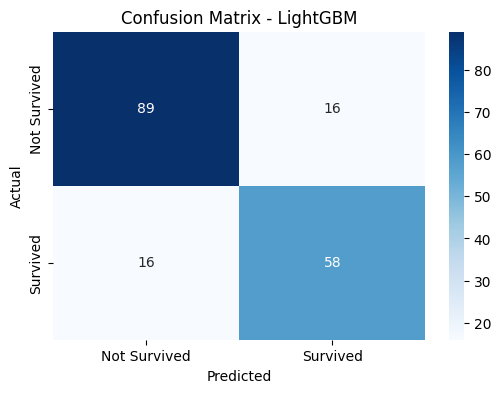

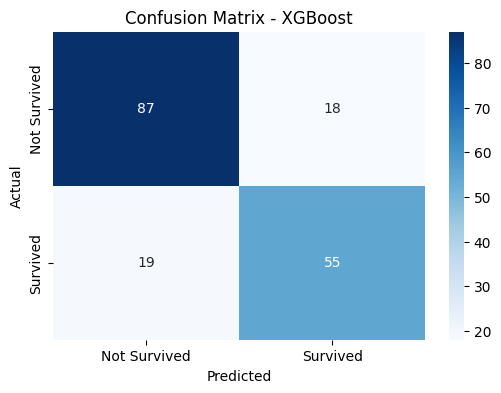

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()